### <span style = 'color:green'>problem statement : detect credit card fraud transactions using Logistic Regression</span>

.


- Logistic Regression is a Machine Learning algorithm used to make predictions to find the value of a dependent variable such as the condition of a tumor (malignant or benign), classification of email (spam or not spam), or admission into a university (admitted or not admitted) by learning from independent variables (various features relevant to the problem).

**Difference between Logistic and Linear Regression**
The major difference between Logistic and Linear Regression is that Linear Regression is used to solve regression problems whereas Logistic Regression is used for classification problems.

**About the dataset**
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions



**Expected output**
- **Use histogram to represent to all the data**
- **Use Classification Report for scores**
- **Plot confusion matrix**


# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">Credit Card Fraud Detection </span> </div>

In [1]:
# Importing neccessory libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('creditcard.csv') # read csv file Import as per your location 

In [3]:
df.head() # Checking top 5 rows 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail() # bottom 5 rows to understand data set 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.shape # Number of row and col 

(284807, 31)

In [6]:
print(df.info()) # information about the data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum() # we dont have any null value in the data set 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

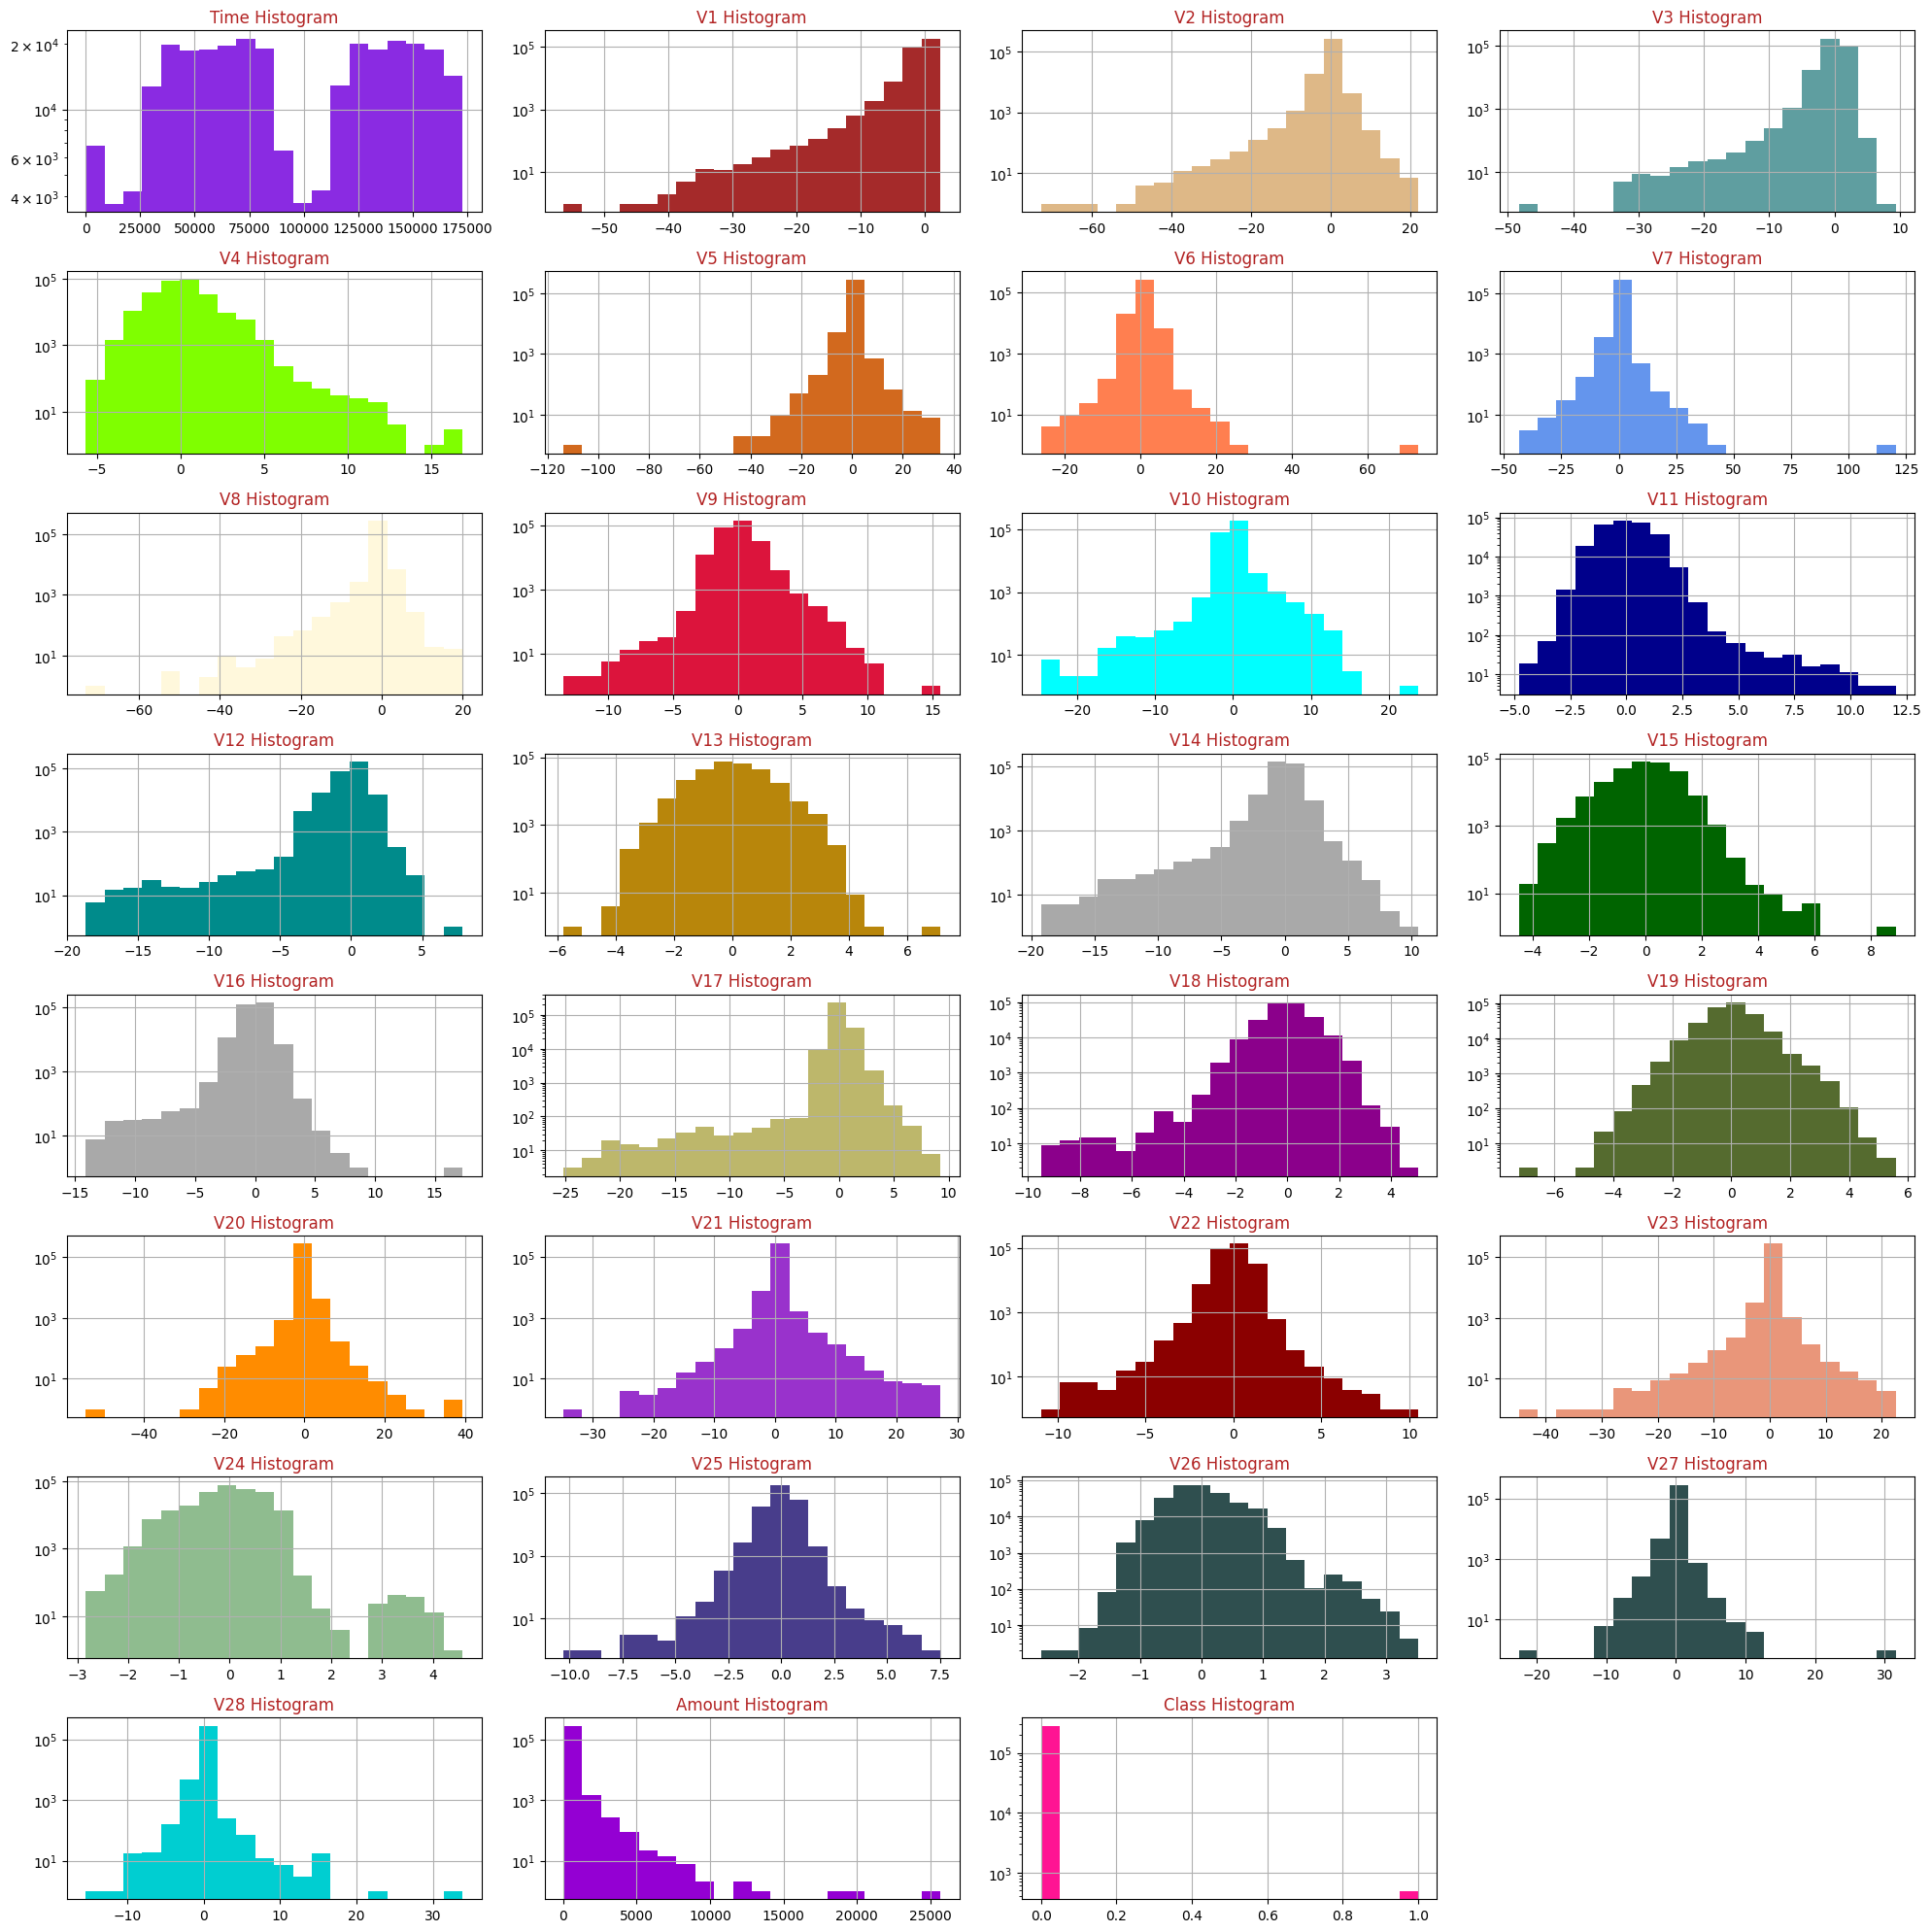

In [8]:
# histogram of all the data 
import matplotlib.colors as mcl
colors = list(mcl.CSS4_COLORS.keys())[10:]
def histo(df,features,rows,col):
    fig = plt.figure(figsize=(20,20))
    for i,feature in enumerate(features):
        ax = fig.add_subplot(rows,col,i+1)
        df[feature].hist(bins =20,ax=ax ,facecolor =colors[i])
        ax.set_title(feature+' Histogram',color = colors[35])
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
histo(df,df.columns,8,4)

In [9]:
df['Class'].value_counts()# Counts the categorical variable frequency 

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class'>

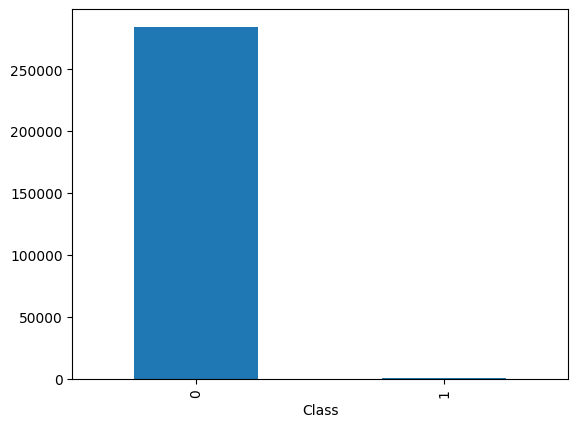

In [10]:
df['Class'].value_counts().plot(kind= 'bar') 

In [11]:
df['Amount'].describe() # mean transiction of 88.34 dollar understand through describing 

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

0-valid Transiction and 1-- fraud Transiction

In [12]:
valid = df[df['Class']==0] # valid transiction data set 


In [13]:
fraud = df[df['Class']==1] # fraudulent data set 

In [14]:
print(valid.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [15]:
fraud['Amount'].describe()  # we can se high amout in mean transiction as compared to the valid

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<Axes: ylabel='Frequency'>

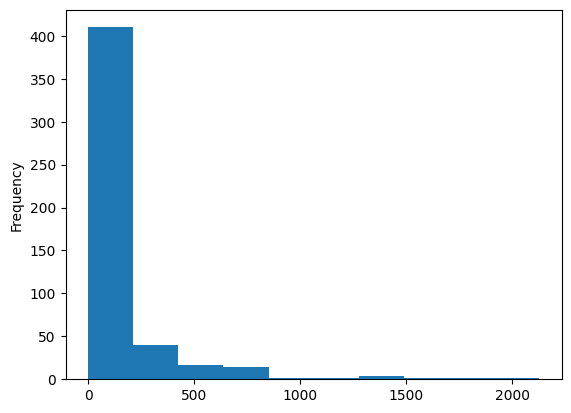

In [17]:
fraud['Amount'].plot(kind = 'hist') # under standing distribution of data in fraud trans

<Axes: ylabel='Frequency'>

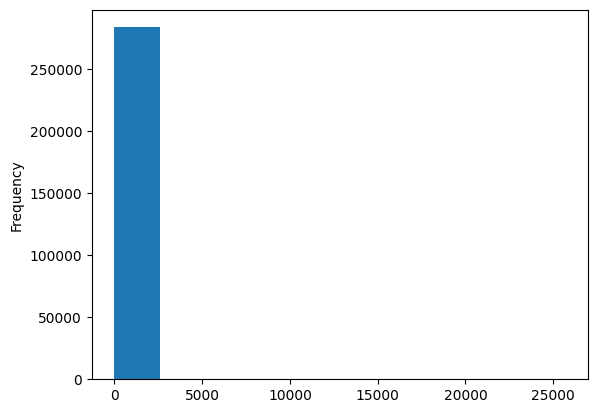

In [18]:
valid['Amount'].plot(kind = 'hist')

In [19]:
from scipy.stats import ttest_ind # checking our point to check the diffrence in mean in fraud and valid data in Amount

In [20]:

# Perform the t-test
t_stat, p_value = ttest_ind(valid['Amount'], fraud['Amount'], equal_var=False)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


T-statistic: -2.928789530856467
P-value: 0.003560518851710299
Reject the null hypothesis: There is a significant difference between the means.


In [21]:
t_stat, p_value = ttest_ind(fraud['Amount'], valid['Amount'], alternative='greater')

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean of 'fraud' is statistically greater than the mean of 'valid'.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that the mean of 'fraud' is greater than the mean of 'valid'.")


T-statistic: 3.00555231397141
P-value: 0.0013256103245958416
Reject the null hypothesis: The mean of 'fraud' is statistically greater than the mean of 'valid'.


So we can say that fraud transition were diffrent form the legit transiction 
---and fraud transiction where of more amount

Now as we know our data set is imbalance so we will take sample out of the data valid data set to make it 
equal to fraud data set 

In [22]:
legit = valid.sample(n = 492) # take 493 random sample as we 492 rows in fraud case too 

In [23]:
legit.shape

(492, 31)

In [24]:
fraud.shape

(492, 31)

<Axes: ylabel='Frequency'>

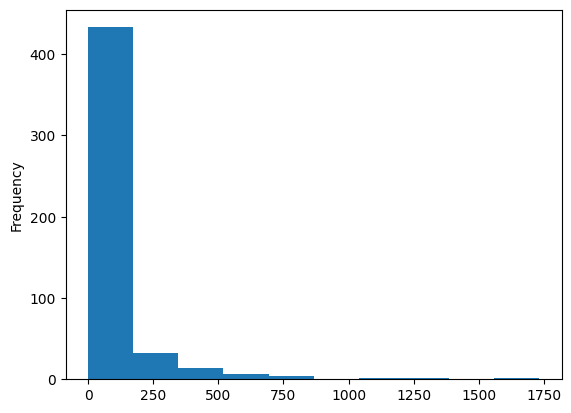

In [25]:
legit['Amount'].plot(kind = 'hist') # distribution of amout in sample data 

In [26]:
df_new = pd.concat([legit,fraud],axis = 0) # concantion are both lgit and fraud for the data regression 

In [27]:
df_new.shape # shape of new data 

(984, 31)

In [28]:
df_new['Class'].value_counts() # no we have equal  number both the case 

Class
0    492
1    492
Name: count, dtype: int64

In [29]:
X = df_new.drop('Class',axis =1)

In [30]:
y = df_new['Class']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.2,stratify=y,random_state=2) # split the data to for training and testing 

In [32]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(787, 30) (197, 30) (787,) (197,)


In [33]:
model = LogisticRegression() # making instance of logistic regresion model 

In [34]:
model.fit(X_train,y_train)

LogisticRegression()

In [35]:
Xtest_pred = model.predict(X_test)  # prediction based on test data 

In [36]:
print('Accuracy based on  test data-',metrics.accuracy_score(Xtest_pred,y_test))

Accuracy based on  test data- 0.9086294416243654


In [37]:
Xtrain_pred = model.predict(X_train)

In [38]:
print('Accuracy based on  training data -',metrics.accuracy_score(Xtrain_pred,y_train))

Accuracy based on  training data - 0.9199491740787802


In [39]:
# confusion metrix  for test data 

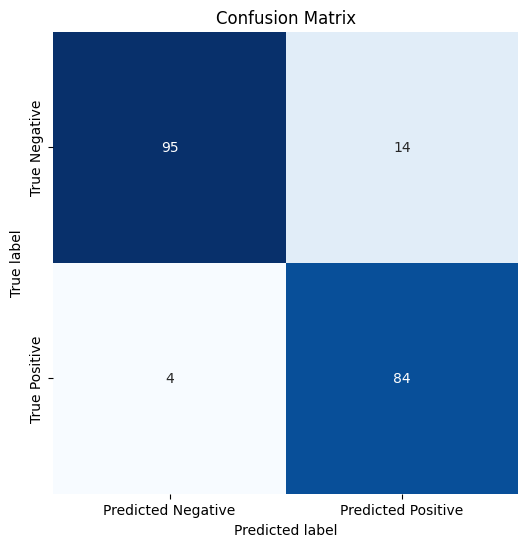

In [40]:
cm = metrics.confusion_matrix(Xtest_pred,y_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


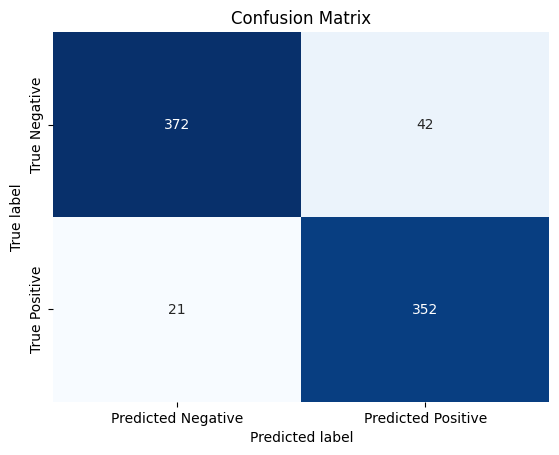

In [41]:
cm = metrics.confusion_matrix(Xtrain_pred,y_train)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [42]:
from sklearn.metrics import classification_report

print(classification_report(Xtrain_pred,y_train)) # for train data

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       414
           1       0.89      0.94      0.92       373

    accuracy                           0.92       787
   macro avg       0.92      0.92      0.92       787
weighted avg       0.92      0.92      0.92       787



In [43]:
print(classification_report(Xtest_pred,y_test)) # For test data 

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       109
           1       0.86      0.95      0.90        88

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197




# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">ThankYou </span> </div>
